In [3]:
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint

In [4]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
df.shape

(1804874, 45)

In [5]:
df.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [6]:
df["threat"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.1
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
1804844    0.0
1804845    0.0
1804846    0.0
1804847    0.0
1804848    0.0
1804849    0.0
1804850    0.0
1804851    0.0
1804852    0.0
1804853    0.0
1804854    0.0
1804855    0.0
1804856    0.0
1804857    0.0
1804858    0.0
1804859    0.0
1804860    0.0
1804861    0.0
1804862    0.0
1804863    0.0
1804864    0.0
1804865    0.0
1804866    0.0
1804867    0.0
1804868    0.0
1804869    0.0
1804870    0.0
1804871    0.0
1804872    0.0
1804873    0.0
Name: threat, Length: 1804874, dtype: float64

In [7]:
pos_threat = df['threat'] == 1
obscene = df['obscene'] == 1

In [8]:
obscene.sum()

165

In [9]:
df.loc[(pos_threat) & (~obscene), ['threat', 'obscene']].count()

threat     135
obscene    135
dtype: int64

In [10]:
df.loc[(obscene) & (~pos_threat), ['threat', 'obscene']].count()

threat     165
obscene    165
dtype: int64

In [11]:
 df.loc[(~obscene) & (~pos_threat), ['threat', 'obscene' ]].count()

threat     1804574
obscene    1804574
dtype: int64

In [12]:
df.groupby('threat')['obscene'].count()

threat
0.000000    1697945
0.000455          1
0.000458          1
0.000463          1
0.000466          1
0.000468          1
0.000470          1
0.000470          1
0.000473          1
0.000534          1
0.000534          1
0.000540          1
0.000543          1
0.000549          1
0.000553          1
0.000554          1
0.000555          1
0.000555          1
0.000557          1
0.000565          1
0.000565          1
0.000571          1
0.000579          1
0.000581          1
0.000581          1
0.000584          1
0.000584          1
0.000588          1
0.000591          1
0.000592          1
             ...   
0.948915          1
0.949263          1
0.949438          1
0.949536          1
0.950290          1
0.950374          1
0.951206          1
0.951829          1
0.951950          1
0.952091          1
0.953125          1
0.953263          1
0.953519          1
0.954096          1
0.954133          1
0.956243          1
0.956962          1
0.957153          1
0.957639     

In [13]:
max_threat = df['threat'] >= 0.5
df['threat_binary'] = max_threat

In [14]:
df['threat_binary'].astype(int)

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1804844    0
1804845    0
1804846    0
1804847    0
1804848    0
1804849    0
1804850    0
1804851    0
1804852    0
1804853    0
1804854    0
1804855    0
1804856    0
1804857    0
1804858    0
1804859    0
1804860    0
1804861    0
1804862    0
1804863    0
1804864    0
1804865    0
1804866    0
1804867    0
1804868    0
1804869    0
1804870    0
1804871    0
1804872    0
1804873    0
Name: threat_binary, Length: 1804874, dtype: int64

In [15]:
max_obscene = df['obscene'] >= 0.5
df['obscene_binary'] = max_obscene
df['obscene_binary'].astype(int)

0          0
1          0
2          0
3          0
4          0
5          1
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1804844    0
1804845    0
1804846    0
1804847    0
1804848    0
1804849    0
1804850    0
1804851    0
1804852    0
1804853    0
1804854    0
1804855    0
1804856    0
1804857    1
1804858    0
1804859    0
1804860    0
1804861    0
1804862    0
1804863    0
1804864    0
1804865    0
1804866    0
1804867    0
1804868    0
1804869    0
1804870    0
1804871    0
1804872    0
1804873    0
Name: obscene_binary, Length: 1804874, dtype: int64

In [16]:
df.groupby('threat_binary')['obscene_binary'].count()

threat_binary
False    1800594
True        4280
Name: obscene_binary, dtype: int64

In [17]:
df.groupby(['threat_binary', 'obscene_binary'])['id'].count()

threat_binary  obscene_binary
False          False             1791093
               True                 9501
True           False                4178
               True                  102
Name: id, dtype: int64

In [18]:
df.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,threat_binary,obscene_binary
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,False,False
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,False,False


In [19]:
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count', 'threat_binary',
       'obscene_binary'],
      dtype='object')

In [5]:
df['date_only'] = pd.to_datetime(df['created_date']).dt.date

In [21]:
counts_over_time = df.groupby('date_only')['id'].count().reset_index()

In [22]:
sns.set(rc={'figure.figsize': (11.7,8.27)})

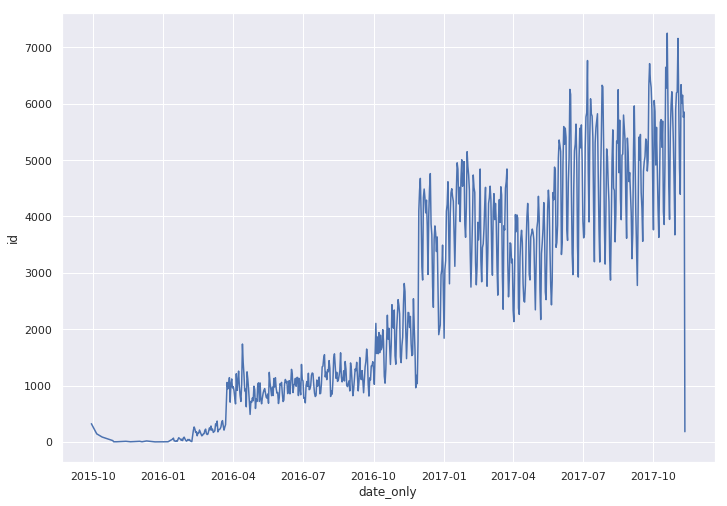

In [23]:
sns.lineplot(x = 'date_only', y = 'id', data = counts_over_time)

In [9]:
all_ethnicities = df.groupby('date_only')['asian', 'black', 'white', 'latino', 'other_race_or_ethnicity'].sum().reset_index()

In [25]:
all_ethnicities

,date_only,asian,black,white,latino,other_race_or_ethnicity
0,2015-09-29,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-10-06,0.000000,0.000000,0.000000,0.000000,0.000000
2,2015-10-13,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-10-27,0.000000,0.000000,0.000000,0.000000,0.000000
4,2015-10-28,0.000000,0.000000,0.000000,0.000000,0.000000
5,2015-11-01,0.000000,0.000000,0.000000,0.000000,0.000000
6,2015-11-13,0.000000,0.000000,0.000000,0.000000,0.000000
7,2015-11-17,0.000000,0.000000,0.000000,0.000000,0.000000
8,2015-11-18,0.000000,0.000000,0.000000,0.000000,0.000000
9,2015-11-19,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
melted_ethnicities = all_ethnicities.melt('date_only', var_name = 'Ethnicities', value_name = 'count')

In [27]:
sns.set(rc={'figure.figsize': (11.7,8.27)})

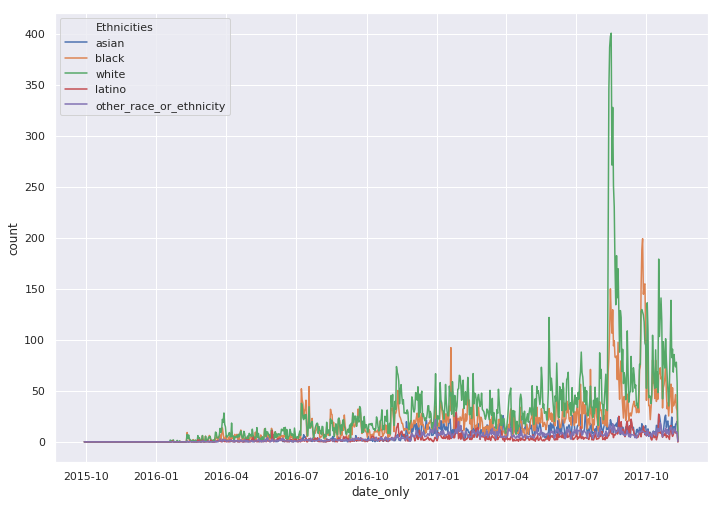

In [28]:
sns.lineplot(x= 'date_only', y = 'count', data = melted_ethnicities, hue = 'Ethnicities')

In [29]:
all_ethnicities.loc[all_ethnicities['white'].idxmax()]

date_only                  2017-08-16
asian                         19.0199
black                         125.279
white                         400.823
latino                           8.35
other_race_or_ethnicity       12.4693
Name: 597, dtype: object

In [30]:
melted_ethnicities.head(15)

,date_only,Ethnicities,count
0,2015-09-29,asian,0.0
1,2015-10-06,asian,0.0
2,2015-10-13,asian,0.0
3,2015-10-27,asian,0.0
4,2015-10-28,asian,0.0
5,2015-11-01,asian,0.0
6,2015-11-13,asian,0.0
7,2015-11-17,asian,0.0
8,2015-11-18,asian,0.0
9,2015-11-19,asian,0.0


In [31]:
all_ethnicities.head()

,date_only,asian,black,white,latino,other_race_or_ethnicity
0,2015-09-29,0.0,0.0,0.0,0.0,0.0
1,2015-10-06,0.0,0.0,0.0,0.0,0.0
2,2015-10-13,0.0,0.0,0.0,0.0,0.0
3,2015-10-27,0.0,0.0,0.0,0.0,0.0
4,2015-10-28,0.0,0.0,0.0,0.0,0.0


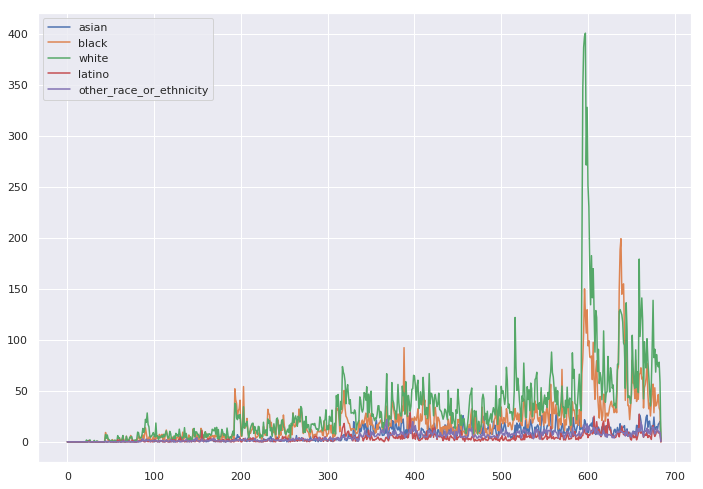

In [32]:
all_ethnicities.plot()

In [6]:
from datetime import date
peak_white_mask = (df['date_only'] == date(2017,8,16)) & (df['white'] >= 0.5)

In [34]:
peak_white_mask.sum()

439

In [35]:
charl = df[peak_white_mask]

In [36]:
charl['comment_text'].values

array(['I caught that also Peter. Benito Amilcare Andrea Mussolini was an Italian politician, journalist, and leader of the National Fascist Party, ruling the country as Prime Minister from 1922 to 1943. Fascist Party. But I am seeing a lot of people trying to blame everything on the "alt-left". BTW "alt-right" is too cute of a name for white supremacists.',
       'Where were there CEO \'s the last 8+ years when militant blacks, Hispanic/Latinos, Muslims, homosexuals and ILLEGALS were rioting in our streets threading whites and our children with death simply for being white? Not a peep from corporate America, the Leftist so called, "Mainstream Media, nor the Regressive Socialist Democrats! Obama and his corrupt crew were doing everything in their power including hiding their instigation of violence and hate and no one called them out on it. All these actions by reservists is simply revealing to America their globalist mind think.',
       "Trump felt compelled by his staff to read the

In [37]:
for x in charl['comment_text']:
    print(x)

I caught that also Peter. Benito Amilcare Andrea Mussolini was an Italian politician, journalist, and leader of the National Fascist Party, ruling the country as Prime Minister from 1922 to 1943. Fascist Party. But I am seeing a lot of people trying to blame everything on the "alt-left". BTW "alt-right" is too cute of a name for white supremacists.
Where were there CEO 's the last 8+ years when militant blacks, Hispanic/Latinos, Muslims, homosexuals and ILLEGALS were rioting in our streets threading whites and our children with death simply for being white? Not a peep from corporate America, the Leftist so called, "Mainstream Media, nor the Regressive Socialist Democrats! Obama and his corrupt crew were doing everything in their power including hiding their instigation of violence and hate and no one called them out on it. All these actions by reservists is simply revealing to America their globalist mind think.
Trump felt compelled by his staff to read the teleprompter condemning the 

In [38]:
%%timeit
counter = 0
for x in df['comment_text']:
    if 'fake news' in x.lower():
        counter += 1

1.15 s ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%%timeit
l = [x for x in df['comment_text'] if 'fake news' in x.lower()]

1.28 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
mask = df['comment_text'].str.lower().str.contains('fake news')

In [41]:
df[mask]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,threat_binary,obscene_binary,date_only
30353,278990,0.300000,"No such thing as a Climate Science ""denier"". A...",0.000000,0.000000,0.100000,0.400000,0.000000,NaN,NaN,...,0,0,0,0,0.0000,0,10,False,False,2016-04-12
128205,399007,0.700000,"Yes, there are lots of stupid, unthinking, gul...",0.000000,0.100000,0.000000,0.600000,0.000000,NaN,NaN,...,0,0,5,0,0.0000,0,10,False,False,2016-07-23
194839,479777,0.000000,The fact is there are far more black on black ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,5,0,0.0000,4,4,False,False,2016-09-18
203626,490896,0.000000,You cherry-picked one election because the ADN...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,2,0,0.0000,0,4,False,False,2016-09-25
226933,520328,0.166667,Wow when did we start calling rapping women th...,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.0,...,0,0,4,0,0.0000,4,6,False,False,2016-10-10
234012,529313,0.000000,I don't tend to believe the 'facts' that come ...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,2,0,0.0000,0,4,False,False,2016-10-14
244301,542545,0.200000,"she is way over her head in this job, go back ...",0.000000,0.000000,0.000000,0.200000,0.000000,NaN,NaN,...,0,0,9,0,0.0000,0,10,False,False,2016-10-21
268921,571934,0.000000,yep. AFN Europe would broadcast The O'reilly ...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,4,0,0.0000,0,4,False,False,2016-11-03
292378,600035,0.500000,Civil Beat has been at the forefront of MANUFA...,0.000000,0.000000,0.000000,0.600000,0.000000,NaN,NaN,...,0,0,1,0,0.0000,0,10,False,False,2016-11-14
299485,609006,0.200000,I think CNN and ADN and a myriad of others are...,0.000000,0.000000,0.000000,0.200000,0.000000,NaN,NaN,...,0,0,7,0,0.0000,0,10,False,False,2016-11-17


In [7]:
import re 

In [8]:
def str_counts(s: str, target: str) -> int:
    return len(re.findall(target, s))

In [44]:
s = "This fake news is such fake news"
str_counts(s,'fake news')

2

In [45]:
df['comment_text'].apply(str_counts, args = ('fake news',)).idxmax()

384103

In [46]:
df.loc[384103]['comment_text']

'Crystal I would challenge you to take his advice when it comes to so called "fake news" publications.  Consortiumnews is not "fake news."  Wikileaks is not "fake news."  Naked Capitalism is not "fake news."  The Intercept is not "fake news."  Counterpunch is not "fake news."  The Ron Paul Institute is not "fake news."  \n\nThe only fake news is the source that claimed these legitimate news sources to be fake in the first place -- The Washington Post.  They are the biggest purveyors of fake news in American history.  They\'ve lied about pretty much every war we\'ve ever been involved in, from their 140 articles talking about the "flat fact" that Saddam had stockpiles of WMD and ties to Al Qaeda and 9/11, to their lies about Gaddafi and Assad, The Washington Post publishes fake news as a matter of policy.  These aren\'t "exceptions," this is the rule.  To be an exception implies that something has changed about their behavior -- it hasn\'t.  The fake news guy is still editorial editor.'

In [47]:
df['mask'] = df['comment_text']

In [48]:
mask = df.groupby('article_id')['mask']

In [49]:
df['comment_text'].describe()

count        1804874
unique       1780823
top       Well said.
freq             184
Name: comment_text, dtype: object

mask.apply(str_counts, args = ('fake news',)).idxmax()

In [50]:
?WordCloud

In [51]:
text = " ".join(x for x in charl['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with", "white"])

In [52]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

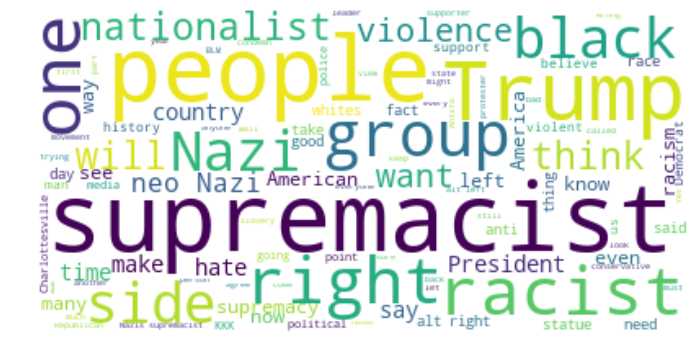

In [53]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
df.loc[df['asian'].idxmax()]

id                                                                                240290
target                                                                                 0
comment_text                           Not a good idea, considering that the elephant...
severe_toxicity                                                                        0
obscene                                                                                0
identity_attack                                                                        0
insult                                                                                 0
threat                                                                                 0
asian                                                                                  1
atheist                                                                                0
bisexual                                                                               0
black                

In [55]:
peak_asian_mask = (df['date_only'] == date(2017,7,14)) & (df['asian'] >= 0.5)
bastille_day = df[peak_asian_mask]

In [56]:
for x in bastille_day['comment_text']:
    print(x)

But the Chinese government doesn't.
Tough luck, gullible Canadians...
This is ridiculous.....there are millions of Chinese just chomping at the bit to come over and throw around their millions.  Your Hongcouverites have yet to see the wrath that the Chinese are about to set upon you.  Grouse mt swallowed up and plans for a spa and hotel up top.  The hell with the bears and wildlife.
No, start taking Mandarin, as the first tidal wave hit in the 90s, the second one this decade, and the ensuing ones will be continuing on in the coming years and decades.  This is no stopping this hydra.........if 10% of the Chinese come to Canada our population rises 400%
RIP BC.....RIP Vancouver...its pretty well  all coming to an end. Talk to a Chinese person about a wetland and he will make you a cash offer to fill it in and build houses.  They do not know what the word environment is.  
How I feel sorry for the animals esp the bears out there....doomed to produce bile in rusted steel cages then slaught

In [57]:
text = " ".join(x for x in bastille_day['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with", "asian"])

In [58]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

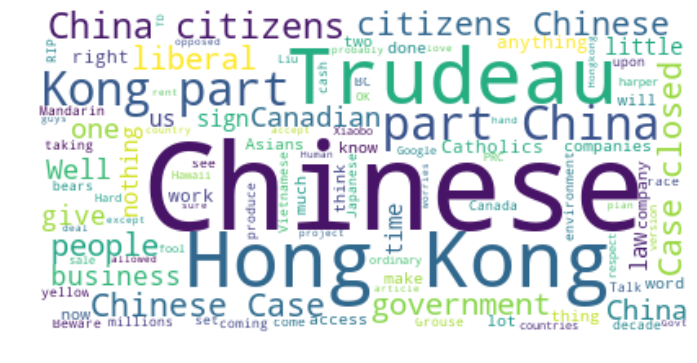

In [59]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
pre_bastille_mask = (df['date_only'] == date(2017,7,13)) & (df['asian'] >= 0.5)
pre_bastille = df[pre_bastille_mask]

In [62]:
text = " ".join(x for x in pre_bastille['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with", "asian"])

In [63]:
wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="white").generate(text)

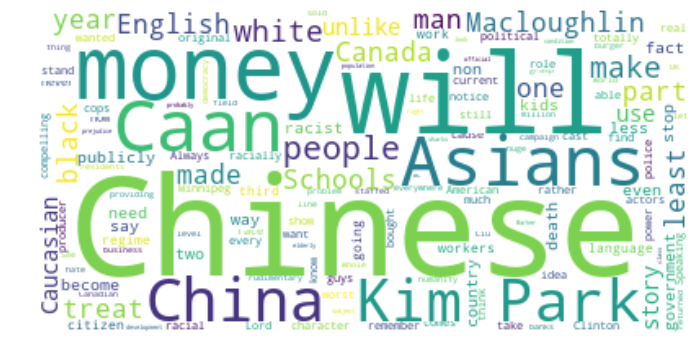

In [64]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
all_ethnicities.loc[all_ethnicities['black'].idxmax()]

date_only                  2017-09-26
asian                         12.3167
black                         199.233
white                         127.239
latino                            9.4
other_race_or_ethnicity       10.6394
Name: 638, dtype: object

In [66]:
peak_black_mask = (df['date_only'] == date(2017,9,26)) & (df['black'] >= 0.5)
kneeling = df[peak_black_mask]

In [67]:
for x in kneeling['comment_text']:
    print(x)

Indeed!  Then neither do my opinions have anything to do with hate.  And I'm a Democrat too.  And a black nun.

Your problem is that you can never admit to your hate because that's what you derogatorily accuse others of when they disagree with your hateful alt-left narrative.

Indeed!  I've accurately diagnosed gary crum as a self-righteous hypocrite based on his holier-than-thou, condescending comments in this forum.  My sympathies to those in your little circle, gary.  Your smugness precedes you.

Hate is defined as "intense or passionate dislike" which means that everyone hates, including you, Sir Gary Crum.  You can claim to not hate 24/7, but your high horse comments betray you.

Here's you Gary - "Self-righteousness (also called sanctimoniousness, sententiousness, and holier-than-thou attitudes) is a feeling or display of (usually smug) moral superiority derived from a sense that one's beliefs, actions, or affiliations are of greater virtue than those of the average person."
Good

In [68]:
text = " ".join(x for x in kneeling['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with", "black"])

In [69]:
wordcloud = WordCloud(stopwords=stopwords, max_words=300, background_color="white").generate(text)

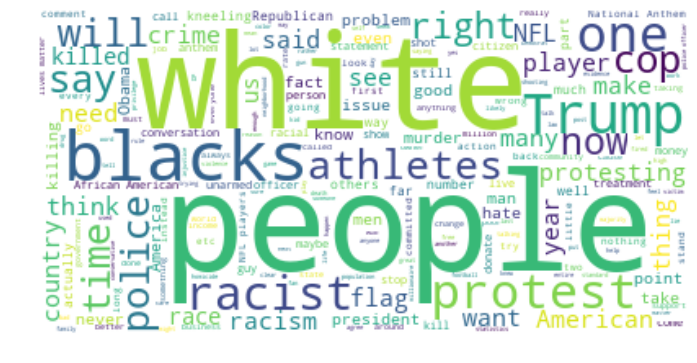

In [70]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
threat_mask = df['threat_binary'] == 1
threats = df[threat_mask]

In [72]:
text = " ".join(x for x in threats['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with"])

In [73]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

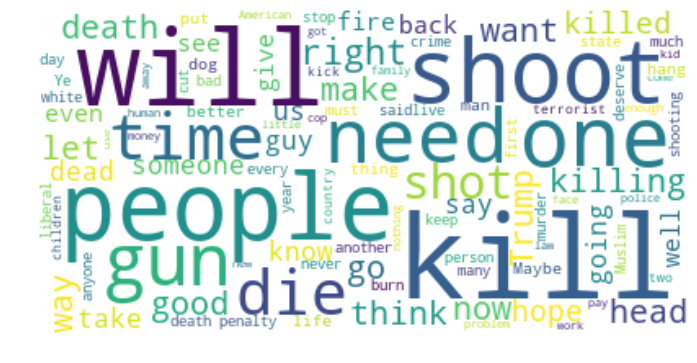

In [74]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
non_threat_mask = df['threat_binary'] == 0
non_threat = df[non_threat_mask]

In [76]:
text = " ".join(x for x in non_threat['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with"])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
obscene_mask = df['obscene_binary'] == 1
obscene = df[obscene_mask]

In [ ]:
text = " ".join(x for x in obscene['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with"])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
sex_gender = df.groupby('date_only')['male', 'female', 'other_gender', 'transgender'].sum().reset_index()

In [ ]:
sex_gender

In [ ]:
melted_sex_gender = sex_gender.melt('date_only', var_name = 'Sex_or_Gender', value_name = 'count')

In [ ]:
sns.set(rc={'figure.figsize': (11.7,8.27)})

In [ ]:
sns.lineplot(x= 'date_only', y = 'count', data = melted_sex_gender, hue = 'Sex_or_Gender')

In [ ]:
sex_gender.loc[sex_gender['female'].idxmax()]['date_only']

In [8]:
peak_female_mask = (df['date_only'] == date(2017,1,22)) & (df['female'] >= 0.5)
womens_march = df[peak_female_mask]

In [ ]:
for x in womens_march['comment_text']:
    print(x)

In [ ]:
text = " ".join(x for x in womens_march['comment_text'])
stopwords = set(STOPWORDS)
stopwords.update(["this", "the", "that", "with"])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_words=300, background_color="white").generate(text)

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['article_id']

In [ ]:
article_comments = df.groupby('article_id')['article_id','comment_text'].apply(lambda x : x)

In [ ]:
print(article_comments)

In [ ]:
article_comments['comment_text'].apply(str_counts, args = ('fake news',)).idxmax()

In [ ]:
article_comments.loc[384103]['comment_text']

In [ ]:
?WordCloud

In [24]:
def wordcloud(df, column, date_, cutoff = 0.5, **kwargs):
    mask = (df['date_only'] == date_) & (df[column] >= cutoff)
    new_mask = df[mask]
    
    stopwords = set(STOPWORDS)
    stopwords.update(["this", "the", "that", "with", ' ', column])
    
    text = " ".join(x for x in new_mask['comment_text'])
    
    text = re.sub(r'\W',' ', text)
    text = text.replace('\n', ' ')
    words = (word.strip() for word in text.split(' ') if word.lower() not in stopwords)
    big_str = ' '.join(words)
    
    if 'max_words' not in kwargs:
        max_words = 20
    else:
        max_words = kwargs['max_words']

#     max_words = kwargs.get('max_words', 20)
    d = ngrams(big_str, kwargs['n'])    
    wordcloud = WordCloud(stopwords=stopwords, max_words= max_words, 
                          background_color="white", width=2000, height=2000).generate_from_frequencies(d)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    pprint(d)

In [ ]:
wordcloud(df, 'asian', date

(TD also gives out really spiffy calendars in Chinese, while the rest of us receive a more ordinary version.)
Newsflash, Globe! People did in custody in China as Harper signed his deal with China and allowed it to buy the BC coal mine that it staffed with Chinese nationals.
"That is called rule of law, blame yourself.

I am not going to invest anything owned by Hongkong guys. They have nothing besides mouth water. Left hand borrow, right hand sell, which is their business practice, nothing from themselves."
.
.
.
Hong Kong is part of China. It's citizens are Chinese.

Case closed.(2017,7,14), max_words = 100) 

In [12]:
def peak_date(df, column):
    grouped = df.groupby('date_only')[column].sum().reset_index()
    return grouped.loc[grouped[column].idxmax()]['date_only']

In [11]:
peak_date(df, 'female')

datetime.date(2017, 1, 22)

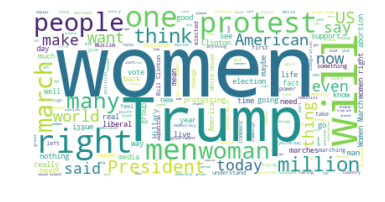

In [12]:
wordcloud(df, 'female', peak_date(df, 'female'), max_words= 200)

In [ ]:
for race in ['asian', 'black', 'white', 'latino', 'other_race_or_ethnicity']:
    print(race, peak_date(df, race))
    wordcloud(df, race, peak_date(df, race))

In [13]:
def ngrams(input, n):
    input = input.split(' ')
    output = {}
    for i in range(len(input)-n+1):
        g = ' '.join(input[i:i+n])
        output.setdefault(g, 0)
        output[g] += 1
    return output

In [14]:
ngrams('a a a b b c c', 2)

{'a a': 2, 'a b': 1, 'b b': 1, 'b c': 1, 'c c': 1}

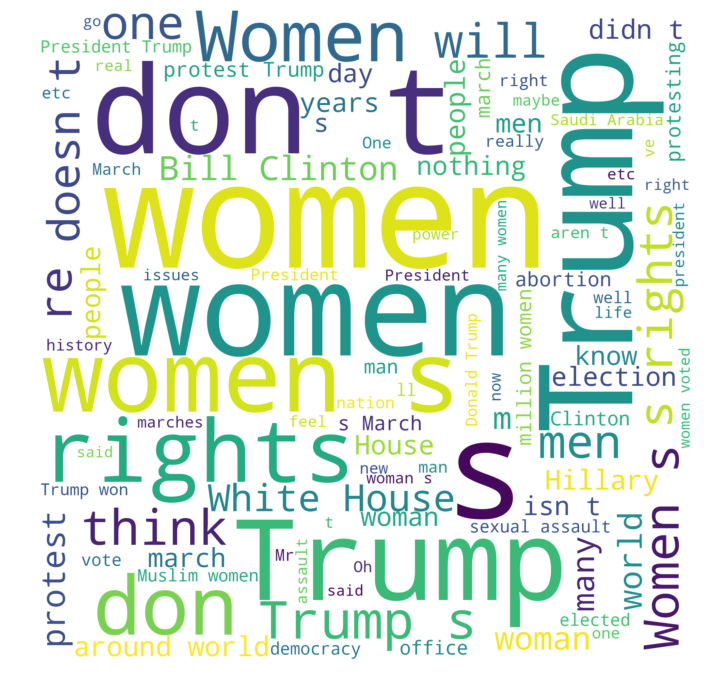

{' ': 2189,
 ' 00001': 3,
 ' 001': 1,
 ' 002': 1,
 ' 01': 1,
 ' 1': 7,
 ' 100': 1,
 ' 10000': 1,
 ' 128': 1,
 ' 130': 1,
 ' 16': 1,
 ' 175': 4,
 ' 1960s': 1,
 ' 1990': 1,
 ' 2': 5,
 ' 20': 2,
 ' 2000': 1,
 ' 2016': 2,
 ' 2017': 8,
 ' 21': 1,
 ' 22': 1,
 ' 25': 1,
 ' 27': 1,
 ' 287': 1,
 ' 3': 4,
 ' 30': 1,
 ' 300': 1,
 ' 340': 1,
 ' 38': 2,
 ' 4': 2,
 ' 400': 1,
 ' 42': 1,
 ' 45': 1,
 ' 500': 4,
 ' 62': 1,
 ' 66': 1,
 ' 7': 1,
 ' 70': 1,
 ' 783': 1,
 ' 8': 4,
 ' 80': 2,
 ' 90K': 1,
 ' ABC': 1,
 ' ACA': 2,
 ' ACTUALLY': 1,
 ' AKA': 1,
 ' AOL': 2,
 ' Abortion': 1,
 ' Accept': 1,
 ' According': 2,
 ' Accusations': 2,
 ' Actually': 4,
 ' Affordable': 1,
 ' Afraid': 1,
 ' Africa': 1,
 ' African': 2,
 ' Ahahahahahahahahahahahahahahahahhahahahahahaaaa': 1,
 ' Alaska': 2,
 ' Alceste': 1,
 ' Although': 1,
 ' Amazing': 2,
 ' America': 8,
 ' American': 3,
 ' Analyser': 1,
 ' Anglicans': 1,
 ' Another': 3,
 ' Anti': 2,
 ' Anybody': 2,
 ' Anyone': 1,
 ' Anything': 2,
 ' Anyway': 1,
 ' Apparently': 

 ' crowd': 1,
 ' crying': 1,
 ' curious': 4,
 ' current': 3,
 ' custom': 1,
 ' cute': 1,
 ' cutting': 1,
 ' cyber': 1,
 ' d': 4,
 ' dailycaller': 1,
 ' dances': 1,
 ' dark': 1,
 ' darted': 1,
 ' daughter': 1,
 ' daughters': 4,
 ' day': 2,
 ' daycare': 1,
 ' debt': 1,
 ' decency': 1,
 ' decent': 1,
 ' decided': 1,
 ' decides': 1,
 ' deciding': 1,
 ' decry': 1,
 ' defecits': 1,
 ' defense': 2,
 ' dehumanizing': 1,
 ' delusional': 1,
 ' demand': 1,
 ' demeaning': 2,
 ' democracy': 2,
 ' democratic': 1,
 ' democrats': 2,
 ' demonstrably': 1,
 ' demonstrate': 1,
 ' demonstrations': 1,
 ' demonstrators': 1,
 ' dems': 2,
 ' denouncing': 2,
 ' deny': 2,
 ' deplorables': 1,
 ' depressing': 1,
 ' described': 2,
 ' deserve': 2,
 ' despite': 2,
 ' destruction': 1,
 ' determine': 1,
 ' deviant': 1,
 ' dickheads': 1,
 ' didn': 4,
 ' didnt': 1,
 ' diesel': 1,
 ' difference': 7,
 ' dignified': 1,
 ' digress': 1,
 ' directed': 1,
 ' dirty': 1,
 ' disabled': 3,
 ' disappeared': 1,
 ' disbelieved': 1,
 '

 '90 ': 2,
 '90K 100K': 1,
 '95 ': 2,
 '99 per': 1,
 'ABC ': 1,
 'ACA ': 2,
 'ACA opposed': 1,
 'ACA plans': 1,
 'ACTUALLY ': 1,
 'ADVOCATE SEXUAL': 1,
 'ADVOCATES SEXUAL': 1,
 'AKA don': 1,
 'ALASKANS ': 1,
 'ALASKAS ECONOMY': 1,
 'ALIVE Clinton': 1,
 'ALREADY TRUMPELTHINSKIN': 1,
 'AMONG ALASKANS': 1,
 'AOL News': 2,
 'ASSUME ': 1,
 'AUDIT DONE': 1,
 'AWAY GREEDY': 1,
 'Abortion banned': 1,
 'Accept ': 1,
 'According list': 1,
 'According website': 1,
 'Accusations rape': 2,
 'Act ': 1,
 'Act didn': 1,
 'Act now': 1,
 'Action Network': 1,
 'Actually ': 1,
 'Actually don': 1,
 'Actually number': 1,
 'Actually re': 1,
 'Administration 1981': 1,
 'Administration least': 1,
 'Affordable Care': 2,
 'Affordable college': 1,
 'Afraid ': 1,
 'Africa ': 3,
 'African American': 1,
 'African Americans': 1,
 'African nation': 2,
 'African union': 1,
 'Ahahahahahahahahahahahahahahahahhahahahahahaaaa ': 1,
 'Airport ': 1,
 'Al Sharpton': 1,
 'Alaska ': 1,
 'Alaska filled': 1,
 'Alaska laughing': 1

 'Obama got': 1,
 'Obama promised': 1,
 'Obama sold': 1,
 'Obamas performance': 1,
 'Obi Wan': 1,
 'Obviously ': 1,
 'Obviously others': 1,
 'Obviously persistent': 1,
 'Obviously re': 1,
 'Occupy movement': 1,
 'Occupy ones': 2,
 'Oh ': 2,
 'Oh Please': 1,
 'Oh please': 1,
 'Oh testify': 1,
 'Oh wait': 1,
 'Oh well': 2,
 'Oh women': 1,
 'Oh yeah': 1,
 'Oh yes': 1,
 'Ok ': 1,
 'Okay ': 1,
 'Okay Clinton': 1,
 'Old men': 1,
 'Oligarchs bunkered': 1,
 'Oligarchy ': 1,
 'Oligarchy U': 1,
 'Oligarchy worldwide': 1,
 'Oligarcies evident': 1,
 'One Breibart': 1,
 'One Mexican': 1,
 'One chief': 1,
 'One child': 1,
 'One daughter': 1,
 'One good': 1,
 'One half': 1,
 'One men': 1,
 'One messages': 1,
 'One million': 3,
 'Ontarians ': 1,
 'Ontario Canada': 1,
 'Ontario Liberals': 1,
 'Ontario city': 1,
 'Ontario forcing': 1,
 'Ontario marchers': 1,
 'Ontario now': 1,
 'Ontario voter': 1,
 'Opens mouth': 1,
 'Orange Groper': 1,
 'Orders Republican': 1,
 'Oscar Wilde': 1,
 'Ottawa ': 1,
 'Ottawa

 'alaska ': 1,
 'alienated many': 1,
 'alive JFK': 1,
 'alive eloping': 1,
 'alive people': 1,
 'allegations husband': 1,
 'alleged ': 1,
 'alleged 1999': 1,
 'alleged Clinton': 1,
 'allegedly ': 1,
 'allegedly raped': 1,
 'alleging rape': 1,
 'alll educated': 1,
 'allow Bill': 2,
 'allow Muslim': 3,
 'allow man': 1,
 'allowed ': 1,
 'allowed drive': 4,
 'allowed kill': 1,
 'allowed see': 1,
 'allowing dress': 2,
 'allowing educate': 2,
 'allows freedom': 1,
 'almighty Hillary': 3,
 'almost 100': 1,
 'almost 50': 1,
 'almost Women': 1,
 'almost always': 2,
 'almost identical': 1,
 'aloha powered': 1,
 'alone ': 4,
 'alone room': 1,
 'along ': 1,
 'along Democratic': 1,
 'along Hollywood': 1,
 'along business': 1,
 'along families': 1,
 'along oppressed': 1,
 'along support': 1,
 'along teach': 1,
 'along w': 1,
 'already ': 1,
 'already commented': 1,
 'already enough': 1,
 'already impressive': 1,
 'already screaming': 2,
 'already set': 1,
 'already told': 1,
 'already won': 1,
 'alt

 'compensation financial': 1,
 'competing interests': 1,
 'competitive men': 1,
 'complacency political': 1,
 'complain ': 1,
 'complain man': 1,
 'complaining ': 1,
 'complaint ': 1,
 'complete economic': 1,
 'complete support': 1,
 'completely egomaniacs': 1,
 'completely foreign': 1,
 'completely outlaw': 1,
 'completely think': 1,
 'compliment ': 1,
 'comprehension ': 1,
 'comprehension attention': 1,
 'comprise 8th': 1,
 'compromised ': 1,
 'con man': 1,
 'concealed jacket': 1,
 'concensual sex': 1,
 'concentration estrogen': 1,
 'concept ': 1,
 'concept big': 1,
 'concern ': 1,
 'concern far': 1,
 'concern love': 1,
 'concern men': 1,
 'concern women': 1,
 'concerned ': 7,
 'concerned Middle': 1,
 'concerned amassing': 1,
 'concerned gentlemanly': 1,
 'concerned issues': 1,
 'concerns ': 3,
 'concerns Trump': 1,
 'concerns seriously': 2,
 'concerns women': 1,
 'condemn others': 1,
 'condescending elitist': 1,
 'condition women': 1,
 'conditions ': 1,
 'conditions Anchorage': 1,
 

 'families taking': 1,
 'families unfair': 1,
 'family ': 2,
 'family community': 1,
 'family education': 1,
 'family members': 2,
 'family planning': 2,
 'family poverty': 1,
 'family violence': 1,
 'familys worst': 1,
 'fan Trump': 1,
 'fan democracy': 1,
 'fan pro': 1,
 'fans ': 1,
 'fantasy thus': 1,
 'fantasy trump': 1,
 'far ': 6,
 'far President': 1,
 'far Trump': 1,
 'far cry': 1,
 'far exceed': 1,
 'far exceeded': 1,
 'far far': 1,
 'far know': 1,
 'far nothing': 1,
 'far reaching': 1,
 'far reproduction': 1,
 'far right': 1,
 'far superior': 1,
 'far women': 1,
 'fare Trump': 1,
 'farm women': 1,
 'fascinating reading': 1,
 'fascism ': 1,
 'fascism Nazism': 1,
 'fascist creeps': 1,
 'fascist denigrate': 1,
 'fascist empire': 1,
 'fascists dictators': 1,
 'fashioned reporting': 1,
 'fashioned way': 1,
 'fat chick': 1,
 'fat white': 1,
 'fat women': 5,
 'fatcat oligarch': 1,
 'father ': 1,
 'father said': 1,
 'fathers ': 1,
 'fault ': 1,
 'faux feminists': 1,
 'favored courts':

 'hours office': 1,
 'house ': 1,
 'house 600k': 1,
 'house Honour': 2,
 'house aides': 1,
 'house senate': 1,
 'house talk': 1,
 'househusbands attitude': 1,
 'houses ': 1,
 'hows left': 1,
 'ht population': 1,
 'https ': 8,
 'huckster lined': 1,
 'hug afterwards': 1,
 'huge crowds': 1,
 'huge fan': 1,
 'huge group': 1,
 'huge poo': 1,
 'huh ': 1,
 'human ': 3,
 'human beings': 2,
 'human civil': 1,
 'human illegal': 1,
 'human rights': 6,
 'human slavery': 1,
 'human spring': 1,
 'humanistic values': 2,
 'humanity favour': 1,
 'humans culling': 1,
 'humble opinion': 1,
 'humiliated standing': 1,
 'hundred thousands': 2,
 'hundreds cities': 1,
 'hundreds miles': 1,
 'hundreds thousands': 5,
 'hunger ': 1,
 'hunting women': 1,
 'hurt poor': 1,
 'hurting patriarchal': 1,
 'husband ': 9,
 'husband back': 1,
 'husband go': 1,
 'husband said': 1,
 'husband sexual': 2,
 'husbands ': 1,
 'husbands earnings': 1,
 'husbands grandfathers': 1,
 'husbands unemployed': 3,
 'husbands will': 1,
 'hy

 'made ': 2,
 'made China': 1,
 'made anyone': 1,
 'made better': 1,
 'made campaign': 1,
 'made clear': 2,
 'made difference': 1,
 'made greatest': 1,
 'made happen': 1,
 'made loved': 1,
 'made never': 1,
 'made point': 1,
 'made possible': 1,
 'made unguarded': 1,
 'madness result': 1,
 'madonna using': 1,
 'magnitude seen': 1,
 'mags ': 1,
 'mahalo ': 1,
 'mail ballot': 1,
 'main organizer': 1,
 'main reason': 1,
 'main stream': 2,
 'mainstream liberal': 1,
 'mainstream media': 1,
 'maintaining upper': 1,
 'major American': 2,
 'major requisites': 1,
 'major sense': 1,
 'majority ': 1,
 'majority 175': 1,
 'majority 51': 1,
 'majority Constitutional': 2,
 'majority demonstrators': 1,
 'majority house': 1,
 'majority men': 1,
 'majority nearly': 1,
 'majority usa': 1,
 'majority watching': 1,
 'majority women': 1,
 'make ': 2,
 'make America': 1,
 'make MSM': 1,
 'make Man': 1,
 'make REAL': 1,
 'make TV': 1,
 'make blanket': 1,
 'make claim': 1,
 'make country': 1,
 'make deal': 1,

 'pales comparison': 1,
 'panels ': 1,
 'pant suits': 1,
 'pants ': 1,
 'paper ': 1,
 'parade ': 1,
 'paraphrase ': 1,
 'parent ': 1,
 'parent hood': 1,
 'parenthood ': 1,
 'parenthood ACA': 1,
 'parse desperate': 1,
 'parsing shows': 1,
 'part ': 3,
 'part Trump': 1,
 'part campaign': 1,
 'part historic': 1,
 'part inauguration': 1,
 'part lost': 1,
 'part making': 1,
 'part millions': 1,
 'part people': 1,
 'part sending': 1,
 'part win': 1,
 'participants march': 1,
 'participants protest': 1,
 'participants today': 1,
 'participate every': 1,
 'participate wealth': 1,
 'participated ': 1,
 'participated around': 1,
 'participated locked': 1,
 'participated movement': 1,
 'participation trophy': 1,
 'particular interest': 1,
 'particularly women': 1,
 'parties ': 1,
 'partisan activity': 1,
 'partisan difference': 1,
 'partisan preferences': 1,
 'partner buy': 1,
 'parts ': 1,
 'parts re': 1,
 'parts want': 1,
 'party ': 7,
 'party US': 1,
 'party campaign': 1,
 'party deserving': 1

 'respect human': 1,
 'respected ': 1,
 'respecting woman': 1,
 'respects man': 1,
 'respondents ': 1,
 'response ': 2,
 'response Donald': 1,
 'response comments': 1,
 'responsibility ': 2,
 'responsibility make': 1,
 'responsibility pg': 1,
 'responsibility walk': 1,
 'responsibility world': 1,
 'responsible ': 1,
 'responsible end': 1,
 'responsible leader': 2,
 'responsible regarding': 1,
 'responsible throwing': 1,
 'responsible woman': 1,
 'responsibly ': 1,
 'rest ': 2,
 'rest mainstream': 1,
 'rest shrill': 1,
 'rest us': 1,
 'rest world': 1,
 'restaurants offering': 1,
 'restore power': 1,
 'restrict reproductive': 1,
 'restrictive laws': 1,
 'result enough': 1,
 'result lawsuit': 1,
 'result sinsiter': 1,
 'result somewhat': 1,
 'resulting 50': 1,
 'resulting march': 1,
 'resulting victim': 1,
 'results ': 2,
 'results democratic': 1,
 'results different': 1,
 'results measured': 1,
 'retail workers': 1,
 'retain control': 1,
 'retired teacher': 1,
 'returning 11': 1,
 'retur

 'streets better': 1,
 'streets protest': 3,
 'streets today': 1,
 'streets womens': 1,
 'strength ': 1,
 'strength appeal': 1,
 'strength conviction': 1,
 'stress elected': 1,
 'stretch say': 1,
 'strides ': 1,
 'strokes pen': 1,
 'strollers high': 1,
 'strong ': 1,
 'strong hold': 1,
 'strong independent': 1,
 'strong message': 1,
 'strong smell': 3,
 'strong will': 1,
 'strong woman': 2,
 'strong women': 3,
 'strongly advocates': 1,
 'strongly bodies': 1,
 'strongman American': 1,
 'structure Washington': 1,
 'struggle along': 1,
 'struggle crowd': 1,
 'struggle will': 1,
 'struggling masses': 1,
 'struggling working': 1,
 'stubborn Sanders': 1,
 'stuck ': 1,
 'students got': 1,
 'students working': 1,
 'stuff ': 3,
 'stuff tyrants': 1,
 'stumbles open': 1,
 'stunning indictment': 1,
 'stunt nothing': 1,
 'stupid march': 1,
 'stupid mindlessness': 1,
 'stupid rationalizations': 1,
 'stupid recognize': 1,
 'stupidity statement': 1,
 'style rape': 1,
 'subject ': 1,
 'subjugate men': 

 'want taken': 1,
 'want think': 1,
 'want us': 1,
 'want vote': 1,
 'want walk': 1,
 'want women': 1,
 'wanted ': 1,
 'wanted certifiably': 1,
 'wanted disgusting': 1,
 'wanted honour': 1,
 'wanted voted': 1,
 'wanting ': 1,
 'wanting better': 1,
 'wanting blow': 1,
 'wanting even': 1,
 'wanting take': 1,
 'wanting world': 1,
 'wants ': 5,
 'wants Muslim': 1,
 'wants body': 1,
 'wants recognized': 1,
 'wants register': 1,
 'wants repeal': 1,
 'wants retain': 1,
 'wants smoke': 1,
 'wants stop': 1,
 'wants weaken': 1,
 'war ': 6,
 'war Broaddrick': 1,
 'war spirit': 1,
 'war women': 3,
 'warfare ': 1,
 'warming ': 1,
 'warned ': 1,
 'warning authoritarian': 1,
 'warning authoritarians': 1,
 'warnings election': 3,
 'warrant protest': 1,
 'wars amazing': 1,
 'wars cinch': 1,
 'wars hell': 1,
 'wasn t': 6,
 'wasting time': 2,
 'watch ': 3,
 'watch Paul': 1,
 'watch certainly': 1,
 'watch list': 1,
 'watch realize': 1,
 'watch speech': 1,
 'watch v': 3,
 'watched sides': 1,
 'watching ': 

In [25]:
# d = ngrams(' '.join(x for x in womens_march['comment_text']), 2)
wordcloud(df, 'female', peak_date(df, 'female'), max_words= 100, n=2)


In [30]:
ngrams(' i am i     i i ', 2)

{' i': 2, 'i am': 1, 'am i': 1, 'i ': 2, ' ': 3, 'i i': 1}